# Задачи
    [x] Импортируйте библиотеку pandas как pd. Загрузите датасет bookings.csv с разделителем ;. 

    [x] Проверьте размер таблицы, типы переменных, а затем выведите первые 7 строк, чтобы посмотреть на данные. 

    [x] Приведите названия колонок к нижнему регистру и замените пробелы на знак нижнего подчеркивания.

    [x] Пользователи из каких стран совершили наибольшее число успешных бронирований? Укажите топ-5.

    [x] На сколько ночей в среднем бронируют отели разных типов?

    [x] Иногда тип номера, полученного клиентом (assigned_room_type), отличается от изначально забронированного (reserved_room_type). Такое может произойти, например, по причине овербукинга. Сколько подобных наблюдений встретилось в датасете?

    [ ] Проанализируйте даты запланированного прибытия. 
        – На какой месяц чаще всего успешно оформляли бронь в 2016? Изменился ли самый популярный месяц в 2017?
        – Сгруппируйте данные по годам и проверьте, на какой месяц бронирования отеля типа City Hotel отменялись чаще всего в каждый из периодов.

    [ ] Посмотрите на числовые характеристики трёх переменных: adults, children и babies. Какая из них имеет наибольшее среднее значение?

    [ ] Создайте колонку total_kids, объединив children и babies. Отели какого типа в среднем пользуются большей популярностью у клиентов с детьми?

    [ ] Создайте переменную has_kids, которая принимает значение True, если клиент при бронировании указал хотя бы одного ребенка (total_kids), и False – в противном случае. Посчитайте отношение количества ушедших пользователей к общему количеству клиентов, выраженное в процентах (churn rate). Укажите, среди какой группы показатель выше.

In [1]:
import pandas as pd

In [10]:
booking = pd.read_csv('https://stepik.org/media/attachments/lesson/360344/bookings.csv' \
                      ,sep=';'])

## Rename columns into lowcase with underscore

In [16]:
def standard_name(name):
    return name.lower().replace(' ', '_')

In [20]:
booking = booking.rename(columns=standard_name)

In [112]:
booking.shape

(119390, 21)

In [27]:
booking.dtypes

hotel                                object
is_canceled                           int64
lead_time                             int64
arrival_full_date            datetime64[ns]
arrival_date_year                     int64
arrival_date_month                   object
arrival_date_week_number              int64
arrival_date_day_of_month             int64
stays_in_weekend_nights               int64
stays_in_week_nights                  int64
stays_total_nights                    int64
adults                                int64
children                            float64
babies                                int64
meal                                 object
country                              object
reserved_room_type                   object
assigned_room_type                   object
customer_type                        object
reservation_status                   object
reservation_status_date      datetime64[ns]
dtype: object

In [40]:
booking[booking.children.isna()]

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015-08-03,2015,August,32,3,1,0,...,2,NaN,0,BB,PRT,B,B,Transient-Party,Canceled,2015-08-01
40667,City Hotel,1,1,2015-08-05,2015,August,32,5,0,2,...,2,NaN,0,BB,PRT,B,B,Transient-Party,Canceled,2015-08-04
40679,City Hotel,1,1,2015-08-05,2015,August,32,5,0,2,...,3,NaN,0,BB,PRT,B,B,Transient-Party,Canceled,2015-08-04
41160,City Hotel,1,8,2015-08-13,2015,August,33,13,2,5,...,2,NaN,0,BB,PRT,B,B,Transient-Party,Canceled,2015-08-09


In [42]:
booking.iloc[40600]

hotel                                 City Hotel
is_canceled                                    1
lead_time                                      2
arrival_full_date            2015-08-03 00:00:00
arrival_date_year                           2015
arrival_date_month                        August
arrival_date_week_number                      32
arrival_date_day_of_month                      3
stays_in_weekend_nights                        1
stays_in_week_nights                           0
stays_total_nights                             1
adults                                         2
children                                     NaN
babies                                         0
meal                                          BB
country                                      PRT
reserved_room_type                             B
assigned_room_type                             B
customer_type                    Transient-Party
reservation_status                      Canceled
reservation_status_d

In [24]:
booking.arrival_full_date = pd.to_datetime(booking.arrival_full_date)
booking.reservation_status_date = pd.to_datetime(booking.reservation_status_date)

In [32]:
booking.children.value_counts().sum()

119386

In [50]:
booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,3.427900,1.856403,0.103890,0.007949
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,2.557439,0.579261,0.398561,0.097436
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,4.000000,2.000000,0.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,69.000000,55.000000,10.000000,10.000000


## Пользователи из каких стран совершили наибольшее число успешных бронирований? Укажите топ-5.


In [64]:
succes_by_country = booking.query('is_canceled == 0') \
    .groupby(by='country', as_index=False) \
    .agg({'hotel': 'count'}) \
    .sort_values(by='hotel', ascending=False, ignore_index=True) \
    .head(5)
succes_by_country

,country,hotel
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069


<AxesSubplot:xlabel='country'>

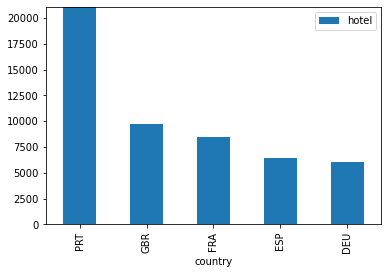

In [66]:
succes_by_country.plot(x='country', y='hotel', kind='bar', ylim=(0, succes_by_country.hotel.max()))

## На сколько ночей в среднем бронируют отели разных типов?

In [58]:
hotel_total_night = booking.groupby(by='hotel', as_index=False).agg({'stays_total_nights': 'mean'})
hotel_total_night

,hotel,stays_total_nights
0,City Hotel,2.978142
1,Resort Hotel,4.318547


<AxesSubplot:xlabel='hotel'>

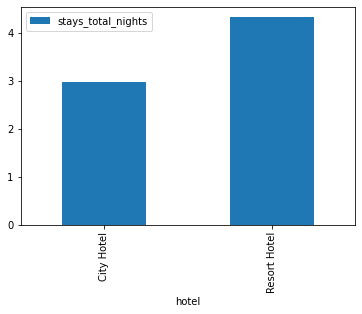

In [62]:
hotel_total_night.plot(x='hotel', y='stays_total_nights', kind='bar')

## Иногда тип номера, полученного клиентом (assigned_room_type), отличается от изначально забронированного (reserved_room_type). Такое может произойти, например, по причине овербукинга. Сколько подобных наблюдений встретилось в датасете?

In [113]:
booking.query('reserved_room_type != assigned_room_type'\
             )[['reserved_room_type', 'assigned_room_type']].shape[0]

14917

## Проанализируйте даты запланированного прибытия. 
    – На какой месяц чаще всего успешно оформляли бронь в 2016? Изменился ли самый популярный месяц в 2017?
    – Сгруппируйте данные по годам и проверьте, на какой месяц бронирования отеля типа City Hotel отменялись чаще всего в каждый из периодов.

In [116]:
booking.groupby(by=['arrival_date_year', 'arrival_date_month'])\
    .agg({'hotel': 'count'})

hotel
arrival_date_year arrival_date_month       
2015              August               3889
                  December             2920
                  July                 2776
                  November             2340
                  October              4957
                  September            5114
2016              April                5428
                  August               5063
                  December             3860
                  February             3891
                  January              2248
                  July                 4572
                  June                 5292
                  March                4824
                  May                  5478
                  November             4454
                  October              6203
                  September            5394
2017              April                5661
                  August               4925
                  February             4177
                  January              3681
                  July                 5313
                  June                 5647
                  March                4970
                  May                  6313

    – Сгруппируйте данные по годам и проверьте, на какой месяц бронирования отеля типа City Hotel отменялись чаще всего в каждый из периодов.

In [119]:
booking.query('hotel == "City Hotel" and is_canceled == 1')\
    .groupby(by=['arrival_date_year', 'arrival_date_month'], as_index=False)['is_canceled']\
    .agg({'is_canceled': 'count'})\
#     .idxmax()

,arrival_date_year,arrival_date_month,is_canceled
0,2015,August,1232
1,2015,December,668
2,2015,July,939
3,2015,November,301
4,2015,October,1321
5,2015,September,1543
6,2016,April,1539
7,2016,August,1247
8,2016,December,1072
9,2016,February,930


In [92]:
booking.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_full_date',
       'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'stays_total_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')